In [1]:
# Basic Pack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## Classifier Metrics
from sklearn.metrics import  f1_score, accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score

# Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

## Regressor Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

# Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

# Turn off warnings to ease reading
import warnings
warnings.filterwarnings('ignore')

# 0. Loading Dataset

In [2]:
data = pd.read_csv('Files/05_encoded.csv')
data.head()

,Title,Publisher,Developer,Hit,Sales_total,Suggest_count,P_Microsoft,P_Nintendo,P_Other,P_PC,...,T_Sci_fi,T_Open_World,T_1st_Person,T_3rd_Person,T_Fantasy,T_Female_Protagonist,T_Hard,T_Pixel_Graphics,Release_Y,Release_M
0,"""Nuke It""",CrystalVision,CrystalVision,0.0,0.060714,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,1998,1
1,#IDARB,Other Ocean Interactive,Other Ocean Interactive,0.0,0.085000,182.0,1,0,0,0,...,0,0,0,0,0,0,0,0,2015,1
2,#killallzombies,Beatshapers,Beatshapers,0.0,0.085000,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,2015,1
3,'70s Robot Anime: Geppy-X,Aroma,Aroma,0.0,0.060714,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1999,5
4,'98 Koshien,Magical Company,Magical Company,0.0,0.146429,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1998,6


In [3]:
data.shape

(37445, 74)

---
## 0.1. Target Encoding

We want to Target Encode `Publisher` and `Developer`. However, before doing that, we should check for redundant values.

In case we find a redundant value, we have to transform them into another non-redundant value.

We also only want the top 30 values for each column, offsetting the rest of values to `Other`.

In [4]:
top_pub = pd.Series(data.Publisher.value_counts()[:50].index)
top_dev = pd.Series(data.Developer.value_counts()[:50].index)

In [5]:
pd.DataFrame({'Develpers': top_dev,'Publishers': top_pub})

,Develpers,Publishers
0,Unknown,Unknown
1,Konami,Sega
2,Sega,Microsoft
3,Capcom,Konami
4,Namco,Nintendo
5,Bandai,Sony Computer Entertainment
6,Hudson Soft,Ubisoft
7,Bandai Namco Games,Electronic Arts
8,Nintendo,Activision
9,SNK Corporation,Capcom


#### Developers

- There are several **Electronic Ars** studios with names 'EA \****' > Transform into `Electronic Arts`.

- **Nintendo**: idem > Transform into `Nintendo`.

- **Ubisoft**: idem > Transform into `Ubisoft`.

- **Konami**: idem > Transform into `Konami`.

- **Sony**: has both developers containing `SCE` (Sony Computer Entertainment), `SIE` (Sony Interactive Entertainment) and `Sony` > Transform into `Sony Interactive Entertainment`.

- There are several combinations of **Bandai** and **Namco**. Now they are **Bandai Namco** > Transform into `Bandai Namco`.

- **Takara** & **Tomy**: idem > Transform into `Takara Tomy`.

- **SquareSoft**, **Square** & **Enix** > Transform into `Square Enix`.


#### Publishers

- **Ubisoft**: same as in `Developers`.

- **Bandai** & **Namco**: idem.

- **Sony**: similar to what happened in `Developers`, but `SIE` doesn't affect.

- **Square** & **Enix**: same as in `Developers`.

- **Electronic Arts**: When looking for `EA`, only variants of `EA Sports` appear. > Unify them under `EA Sports`.

- **Takara** & **Tomy**: same as in `Developers`.

- **Microsoft Game Studios** > Transdform into`Microsoft`

In [6]:
# Lists of redundant publishers

pub_ubi = data.Publisher.value_counts().filter(like='Ubisoft').index.tolist()
pub_bandai_namco = data.Publisher.value_counts().filter(like='Bandai').index.tolist() +\
                   data.Publisher.value_counts().filter(like='Namco').index.tolist()

pub_sie = data.Publisher.value_counts().filter(like='Sony').index.tolist() +\
          data.Publisher.value_counts().filter(like='SCE').index.tolist()

pub_square_e = data.Publisher.value_counts().filter(like='Square').index.tolist() +\
               data.Publisher.value_counts().filter(like='Enix').index.tolist()

pub_ea_sports = data.Publisher.value_counts().filter(regex='^EA\s').index.tolist()

pub_t_tomy = data.Publisher.value_counts().filter(like='Takara').index.tolist() +\
             data.Publisher.value_counts().filter(like='Tomy').index.tolist()

pub_ms = data.Publisher.value_counts().filter(like='Microsoft').index.tolist()


# Dictionaries of redundant publishers with the correction as values

pub_ubi = dict.fromkeys(pub_ubi, 'Ubisoft')
pub_bandai_namco = dict.fromkeys(pub_bandai_namco, 'Bandai Namco')
pub_sie = dict.fromkeys(pub_sie, 'Sony Interactive Entertainment')
pub_square_e = dict.fromkeys(pub_square_e, 'Square Enix')
pub_ea_sports = dict.fromkeys(pub_ea_sports, 'EA Sports')
pub_t_tomy = dict.fromkeys(pub_t_tomy, 'Takara Tomy')
pub_ms = dict.fromkeys(pub_ms, 'Microsoft')

In [7]:
# Lists of redundant developers

dev_electronic_arts = data.Developer.value_counts().filter(regex='^EA\s').index.tolist()
dev_nintendo = data.Developer.value_counts().filter(like='Nintendo').index.tolist()
dev_ubi = data.Developer.value_counts().filter(like='Ubisoft').index.tolist()

dev_bandai_namco = data.Developer.value_counts().filter(like='Bandai').index.tolist() +\
                   data.Developer.value_counts().filter(like='Namco').index.tolist()

dev_konami = data.Developer.value_counts().filter(like='Konami').index.tolist()

dev_t_tomy = data.Developer.value_counts().filter(like='Takara').index.tolist() +\
             data.Developer.value_counts().filter(like='Tomy').index.tolist()

dev_sie = data.Developer.value_counts().filter(like='SCE').index.tolist() +\
          data.Developer.value_counts().filter(regex='^SIE\s').index.tolist() +\
          data.Developer.value_counts().filter(like='Sony').index.tolist()

dev_square_e = data.Developer.value_counts().filter(like='SquareSoft').index.tolist() +\
               data.Developer.value_counts().filter(regex='^Square\s').index.tolist() +\
               data.Developer.value_counts().filter(like='Enix').index.tolist()

# Dictionaries of redundant developers with the correction as values

dev_electronic_arts = dict.fromkeys(dev_electronic_arts, 'Electronic Arts')
dev_nintendo = dict.fromkeys(dev_nintendo, 'Nintendo')
dev_ubi = dict.fromkeys(dev_ubi, 'Ubisoft')
dev_bandai_namco = dict.fromkeys(dev_bandai_namco, 'Bandai Namco')
dev_konami = dict.fromkeys(dev_konami, 'Konami')
dev_t_tomy = dict.fromkeys(dev_t_tomy, 'Takara Tomy')
dev_sie = dict.fromkeys(dev_sie, 'Sony Interactive Entertainment')
dev_square_e = dict.fromkeys(dev_square_e, 'Square Enix')

### 0.1.1. Functions

In [8]:
# Functions we are going to use

def merge_dicts(*dict_args):
    """
    Given any number of dictionaries, merge them into a new dictionaty.
    """
    result = {}
    
    for dictionary in dict_args:
        result.update(dictionary)
        
    return result

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

def combine_redundant(x, **kwargs):
    
    '''
    Combines redundant columns using a dictionary (for Developers and Publishers in this case).
    '''
    
    a_dict = kwargs['kwargs']
    result = x
    value = a_dict.get(x)
    
    if value != None:      
        result = value 
    
    return result

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

def convert_other(x, top_vals, to_drop):
    
    '''
    Converts non-top_vals values for x to 'Other'.
    '''
    
    result = x
    top_vals = top_vals.copy()
    top_vals.remove(to_drop)
    
    if x not in top_vals:
        result = 'Other'
    
    return result

### 0.1.2. Merging Dictionaries & Value Transformation

In [9]:
# Merging the different dictionaries into one single dictionary
pubs = merge_dicts(pub_ubi, pub_bandai_namco, pub_sie,
                   pub_square_e, pub_ea_sports, pub_t_tomy, pub_ms)

devs = merge_dicts(dev_electronic_arts, dev_nintendo, dev_ubi, dev_bandai_namco,
                   dev_konami, dev_t_tomy, dev_sie, dev_square_e)

In [10]:
# Transforming redundant values

data.Publisher = data.Publisher.apply(combine_redundant, kwargs=pubs)
data.Developer = data.Developer.apply(combine_redundant, kwargs=devs)

# We are going to use only the top 30 values of each category

top_vals_pub = list(data.Publisher.value_counts()[:30].index)
top_vals_dev = list(data.Developer.value_counts()[:30].index)

#--------------------------------------------------------------------------------------------------

data.Publisher = data.Publisher.apply(convert_other, top_vals = top_vals_pub, to_drop = 'Unknown')
data.Developer = data.Developer.apply(convert_other, top_vals = top_vals_dev, to_drop = 'Unknown')

### 0.1.3. Target Encoding Columns

We are not dropping the original columns so that whenever we give them an input we can assign the correct encoded value.

In [11]:
from category_encoders import TargetEncoder

te_pub = TargetEncoder()
data['Publisher_enc'] = te_pub.fit_transform(data['Publisher'], data['Sales_total'])

#-----------------------------------------------------------------------------------

te_dev = TargetEncoder()
data['Developer_enc'] = te_dev.fit_transform(data['Developer'], data['Sales_total'])

In [12]:
data

,Title,Publisher,Developer,Hit,Sales_total,Suggest_count,P_Microsoft,P_Nintendo,P_Other,P_PC,...,T_1st_Person,T_3rd_Person,T_Fantasy,T_Female_Protagonist,T_Hard,T_Pixel_Graphics,Release_Y,Release_M,Publisher_enc,Developer_enc
0,"""Nuke It""",Other,Other,0.0,0.060714,NaN,0,0,0,1,...,0,0,0,0,0,0,1998,1,0.313024,0.266744
1,#IDARB,Other,Other,0.0,0.085000,182.0,1,0,0,0,...,0,0,0,0,0,0,2015,1,0.313024,0.266744
2,#killallzombies,Other,Other,0.0,0.085000,NaN,0,0,0,0,...,0,0,0,0,0,0,2015,1,0.313024,0.266744
3,'70s Robot Anime: Geppy-X,Other,Other,0.0,0.060714,NaN,0,0,0,0,...,0,0,0,0,0,0,1999,5,0.313024,0.266744
4,'98 Koshien,Other,Other,0.0,0.146429,NaN,0,0,0,0,...,0,0,0,0,0,0,1998,6,0.313024,0.266744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37440,yOm,Microsoft,Other,0.0,0.060714,NaN,1,0,0,0,...,0,0,0,0,0,0,2009,10,0.132461,0.266744
37441,yOm_fury,Microsoft,Other,0.0,0.060714,NaN,1,0,0,0,...,0,0,0,0,0,0,2009,12,0.132461,0.266744
37442,¡Shin Chan Flipa en colores!,505 Games,Other,0.0,0.050000,NaN,0,1,0,0,...,0,0,0,0,0,0,2007,11,0.204492,0.266744
37443,じんるいのみなさまへ,Other,Nippon Ichi Software,0.0,0.546426,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0.313024,0.123779


---
## 0.2. Missing Values

Let's see what to do with the NaN values.

### 0.2.1. Filling Strategy for Missing Values

Missing values found in: `Suggestion_count`, `C_Score` and `U_Score` columns.

We could do the following with the missing values:

- First, separate the dataframe into 2 dataframes. One has `Sales_total` > 0 and the other, the rest.

    - We want to do this as 2/3 of the dataframe has sales <= 0, which drags the different quantiles near 0.
    - And we want relevant information in games having sales > 0.
    - We can assign 0 to missing values where sales <= 0.
    

- We will fill `NaN`s with 0 in the dataframe with sales <= 0.

- We then perform the next transformation to the dataframe with sales > 0, filling NaNs as follows:

    - 10 <= `Sales_total` ---> `Suggest_count`/ `C_Score`/ `U_Score` => Max

    - Quantile 75 <= `Sales_total` < 10 ---> `Suggest_count`/ `C_Score`/ `U_Score` => Quantile 75

    - Median <= `Sales_total` < Quantile 75 ---> `Suggest_count`/ `C_Score`/ `U_Score` => Quantile 50

    - Quantile 25 <= `Sales_total` < Median ---> `Suggest_count`/ `C_Score`/ `U_Score` => Quantile 25

    - 0 <= `Sales_total` < Quantile 25 ---> `Suggest_count`/ `C_Score`/ `U_Score` => Min

### 0.2.1.1. Splitting the Dataframe

In [13]:
zero_sales = data.index[data['Sales_total'] <= 0].tolist()
non_zero_sales = data.index[data['Sales_total'] > 0].tolist()

data_non_zero = data.drop(index = zero_sales)
data_zero = data.drop(index = non_zero_sales).fillna(0)

### 0.2.1.2. Functions

In [14]:
def binner(x, lim_1, lim_2, lim_3, val_bin1, val_bin2, val_bin3, val_bin4, val_bin5, lim_min = 0, lim_max = 10):
    
    '''
    Given a numeric value x and a series of numeric values, it will return another numeric value depending on in which of the 5 bins x it falls.
    
    x: Value we want to put into a bin.
    -----------------------------------------------------------
    lim_min: Lowest limit of the bins (default = 0).
    lim_1: First limit of the bins.
    lim_2: Second limit of the bins.
    lim_3: Third limit of the bins.
    lim_max: Biggest limit of the bins (default = 10).
    -----------------------------------------------------------
    val_bin1: Value returned when x falls in the 1st bin.
    val_bin2: Value returned when x falls in the 2nd bin.
    val_bin3: Value returned when x falls in the 3rd bin.
    val_bin4: Value returned when x falls in the 4th bin.
    val_bin5: Value returned when x falls in the 5th bin.
    '''
    
    if lim_min < x < lim_1:
        result = val_bin1
        
    elif lim_1 <= x < lim_2:
        result = val_bin2
        
    elif lim_2 <= x < lim_3:
        result = val_bin3
        
    elif lim_3 <= x < lim_max:
        result = val_bin4
    
    elif 10 <= x:
        result = val_bin5
    
    return result

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

def fillna_col(df, col):
    
    '''
    Given a pd.DataFrame() and a column of interest, returns the same pd.DataFrame() object, which column of interest contains numeric values only on rows where there was a NaN.
    Calls the binner() function to decide what numeric values shoud go as output.
    
    df: The dataframe object we want to work with.
    col: A string with the name of the column of interest.
    '''
    
    sales_q25 = df.Sales_total.quantile(0.25)
    sales_med = df.Sales_total.median()
    sales_q75 = df.Sales_total.quantile(0.75)
    
    col_min = df[col].min()
    col_q25 = df[col].quantile(0.25)
    col_med = df[col].median()
    col_q75 = df[col].quantile(0.75)
    col_max = df[col].max()
    
    aux_df_out = df.Sales_total.apply(binner, args = (sales_q25, sales_med, sales_q75, col_min, col_q25, col_med, col_q75, col_max))
    aux_df_filter = df.Suggest_count.isna()
    
    output = aux_df_out * aux_df_filter # We filter out the values where there is already a non-NaN value
    
    df[col] = output + df[col].fillna(0) # fillna(0) to convert NaNs to 0 so that we can perform the addition
    
    return df

### 0.2.1.3. Apllying Transformation

We will merge both dataframes to recover the original dataframe.

In [15]:
data_non_zero = fillna_col(data_non_zero, 'Suggest_count')
data_non_zero = fillna_col(data_non_zero, 'C_Score')
data_non_zero = fillna_col(data_non_zero, 'U_Score')

data = pd.concat([data_non_zero, data_zero]).fillna(0)

### 0.2.2. Train Test Split

We separate the dataframe into 2 dataframes, one containing the independent variables (features) and the other with the dependent variables (target)

We have to train test split before doing the feature selection to prevent information leakage from the test set if done after.

In [16]:
features = data[data.columns[5:]].copy()
target = data[['Hit', 'Sales_total']].copy()

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.5, random_state=27)

---
# 1. Feature Selection

We are going to check the correlation between the features to see which features should be removed.

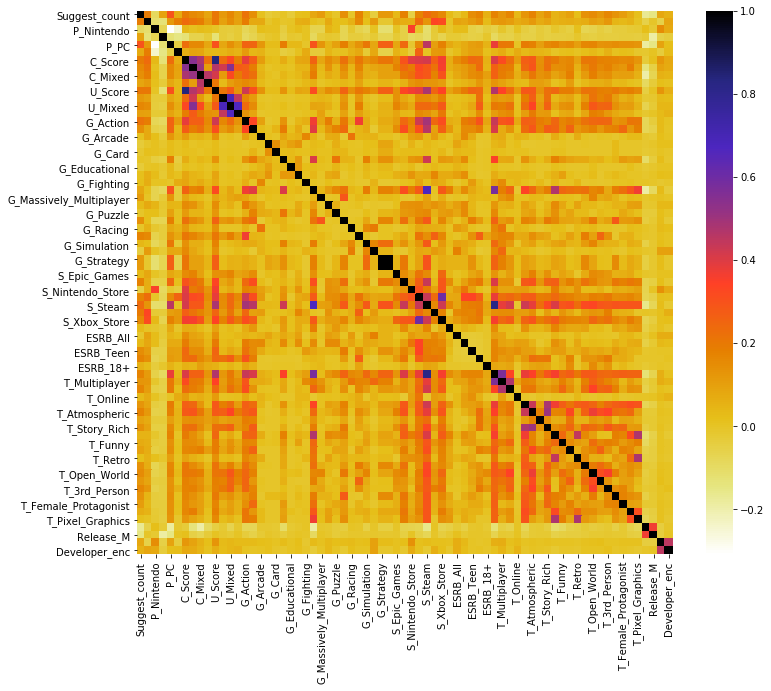

In [17]:
plt.figure(figsize = (12,10))

corr = x_train.corr()
sns.heatmap(corr, cmap = plt.cm.CMRmap_r)
plt.show()

## 1.1. Checking Highly Correlated Values

Let's check which columns have correlation greater than 0.8 an to which column/s.

### 1.1.1. Functions

We are going to create a function to look for features getting a correlation greater than a threshold we define.

We can also take negatively correlated values by doing the absolute value of the correlation.

In [18]:
def correlation(dataset, threshold, neg_corr_important = False):
    
    '''
    Given a dataset and a threshold, returns the column names for those scoring a correlation greater than the threshold.
    If neg_corr_important is set to True, it will return the absolute value of the correlations, thus taking high negative correlations into account.
    
    dataset: A pd.DataFrame() object.
    threshold: The value we want the threshold to be
    '''
    
    col_corr = [] # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        
        for j in range(i):
            
            if neg_corr_important == False:
            
                if corr_matrix.iloc[i, j] > threshold:
                    colname = corr_matrix.columns[i] # Getting the name of column
                    col_corr.append(colname)
                    
            else:
                
                if abs(corr_matrix.iloc[i, j]) > threshold: # We are interested in absolute coeff value
                    colname = corr_matrix.columns[i] # Getting the name of column
                    col_corr.append(colname)
        
    return col_corr

In [19]:
correlation(x_train, 0.8)

['U_Score', 'G_Other', 'T_Singleplayer']

In [20]:
corr[corr['U_Score'] > 0.8].U_Score

C_Score    0.841045
U_Score    1.000000
Name: U_Score, dtype: float64

In [21]:
corr[corr['T_Singleplayer'] > 0.8].T_Singleplayer

S_Steam           0.819019
T_Singleplayer    1.000000
Name: T_Singleplayer, dtype: float64

- We can see that `U_Score` and `C_Score` are highly correlated. This is understandable as in an ideal case, both scores should be similar.

    - To tackle this particular problem, we can combine these columns into a new one, with the mean of them as the new value.
    
    - If one of the values are 0, wo will only sum the columns.

- `T_Singleplayer` is highly correlated with `S_Steam`.

    - To solve this, we should consider to remove either of them.
    
    - We are going to choose removing `S_Steam` as we could also consider removing the entire `S_` columns, as `S_Steam` was one of the main reasons to keep them (to know if a PC game was available on Steam).
    
    - Also because **Singleplayer** is much more wider than `S_Steam`.

## 1.2. Feature Removal/ Combination

We proceed to apply the abovementioned changes:

### 1.2.1. Functions

In [22]:
# This function is to combine C_Score and U_Score

def score_mean(c_score_col, u_score_col):
    
    '''
    Given 2 score columns from a dataframe, returns a column with the mean of them if none of them contained a 0.
    It will return the sum of the elements in the other case instead.
    
    c_score_col: The C_Score column from the dataframe.
    u_score_col: The U_Score column from the dataframe.
    '''
    
    c = (c_score_col > 0).astype(int)
    u = (u_score_col > 0).astype(int)
    
    denom = (c + u).replace(0,1) # If one column has no value in it, we won't do the mean.
    
    scores = (c_score_col + u_score_col) / denom
    
    return scores

### 1.2.2. Combining & Removing Features

In [23]:
# Combinig and removing, part 1

data['Scores'] = score_mean(data['C_Score'], data['U_Score'])
data = data.drop(['C_Score', 'U_Score', 'S_Epic_Games', 'S_GOG', 'S_Nintendo_Store', 'S_PlayStation_Store',
                  'S_Xbox_360_Store', 'S_Xbox_Store', 'S_itch.io', 'S_Steam'], axis = 1)

Now that we no longer have highly correlated features, we are good to continue to the next step. However, let's check the features in case we can reduce them by combining them or removing them.

We can start by checking other relatively high correlated features:

In [24]:
# We do this again so that the recently combined/removed columns don't appear.

features = data[data.columns[5:]].copy()
target = data[['Hit', 'Sales_total']].copy()

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.5, random_state=27)
corr = x_train.corr()

In [25]:
correlation(x_train, 0.70)

['G_Other']

In [26]:
corr[corr['U_Mixed'] > 0.7].U_Mixed

U_Mixed    1.0
Name: U_Mixed, dtype: float64

In [27]:
corr[corr['U_Negative'] > 0.7].U_Negative

U_Negative    1.0
Name: U_Negative, dtype: float64

We can see that `U_Mixed` has a relatively high correlation to and `U_Negative`.

What we could do here is the following:

- Remove both `U_Mixed` and `C_Mixed`, as there is no point in keeping one if we are removing the other.

- Combine `U_Positive` and `C_Positive` to get the total positives.

- In the same way, combine `U_Negative` and `C_Negative`.

In [28]:
# Combining and removing, part 2

data['Positives'] = data['C_Positive'] + data['U_Positive']
data['Negatives'] = data['C_Negative'] + data['U_Negative']
data = data.drop(['C_Mixed', 'U_Mixed', 'C_Positive', 'U_Positive', 'C_Negative', 'U_Negative'], axis = 1)

Let's check that the new columns are not highly correlated to each other:

In [29]:
features = data[data.columns[5:]].copy()
target = data[['Hit', 'Sales_total']].copy()

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.5, random_state=27)
corr = x_train.corr()

correlation(x_train, 0.8)

['G_Other']

Let's check if we see other columns to combine:

In [30]:
data.columns

Index(['Title', 'Publisher', 'Developer', 'Hit', 'Sales_total',
       'Suggest_count', 'P_Microsoft', 'P_Nintendo', 'P_Other', 'P_PC',
       'P_Sony', 'G_Action', 'G_Adventure', 'G_Arcade', 'G_Board_Games',
       'G_Card', 'G_Casual', 'G_Educational', 'G_Family', 'G_Fighting',
       'G_Indie', 'G_Massively_Multiplayer', 'G_Platformer', 'G_Puzzle',
       'G_RPG', 'G_Racing', 'G_Shooter', 'G_Simulation', 'G_Sports',
       'G_Strategy', 'G_Other', 'ESRB_All', 'ESRB_10+', 'ESRB_Teen',
       'ESRB_17+', 'ESRB_18+', 'T_Singleplayer', 'T_Multiplayer', 'T_Co_Op',
       'T_Online', 'T_Great_OST', 'T_Atmospheric', 'T_Violent', 'T_Story_Rich',
       'T_2D', 'T_Funny', 'T_Horror', 'T_Retro', 'T_Sci_fi', 'T_Open_World',
       'T_1st_Person', 'T_3rd_Person', 'T_Fantasy', 'T_Female_Protagonist',
       'T_Hard', 'T_Pixel_Graphics', 'Release_Y', 'Release_M', 'Publisher_enc',
       'Developer_enc', 'Scores', 'Positives', 'Negatives'],
      dtype='object')

We could unify `G_Educational`, `G_Board_Games` and `G_Card` under the `G_Other` column, as they are usually a minor genre group.

To do that, we would sum the 4 columns and convert any value > 1 to 1.

In [31]:
data['G_Other'] = data[['G_Other','G_Educational', 'G_Board_Games', 'G_Card']].sum(axis = 1)\
                                                                    .apply(lambda x: 1 if x >= 1 else 0)

data = data.drop(['G_Educational', 'G_Board_Games', 'G_Card'], axis = 1)

Let's check for correlations again.

In [32]:
features = data[data.columns[5:]].copy()
target = data[['Hit', 'Sales_total']].copy()

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.5, random_state=27)
corr = x_train.corr()

correlation(x_train, 0.8)

['G_Other']

No columns above the threshold, thus we can continue with the next step after saving the dataset into a `.csv` file to use in the next notebook.

The following steps will be ML algorithms testing and hyperparameter optimization (very time-consuming) and they do not modify the dataset, thus the saving now.

In [33]:
data.to_csv("Files/06_prepared_for_ml.csv", encoding='utf-8', index=False)

---
# 2. Testing ML Algorithms - Cross Validation

We are going to test and try different ML algorithms to decide wich one we are going to use (one for regression and one for classification).

To evaluate how good every model is, we are going to use K-Fold Cross Validation and a variety of metrics.

### 2.0.1. Functions

In [34]:
def evaluate(model, x_train, x_test, y_train, y_test, X, Y, classification = True, k = 5):
    
    '''
    Given an estimator and the dataset to train the estimator on, it makes a fit of the model on the data, calculates metrics for the prediction and also a K-Fold cross validation on them.
    
    model: The estimator/ model we want to fit on the data.
    x_train: The train partitioned features dataset.
    x_test: The test partitioned features dataset.
    y_train: The train partitioned target dataset.
    y_test: The test partitioned target dataset.
    X: The full features dataset.
    Y: The full target dataset.
    classification: Whether the problem to solve is classification or regression. (Default = True)
    k: The k of K-Fold cross validation. How many folds we want. (Default = 5)
    '''

    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    
    if classification:
        
        acc = accuracy_score(y_test, y_hat)
        prec = precision_score(y_test, y_hat)
        rec = recall_score(y_test, y_hat)
        f1 = f1_score(y_test, y_hat)
        auc = roc_auc_score(y_test, y_hat)
        confusion = confusion_matrix(y_test, y_hat)

        # K-Fold Cross Validation

        acc_cv = cross_val_score(model, X, Y, cv = k, scoring = 'accuracy')
        prec_cv = cross_val_score(model, X, Y, cv = k, scoring = 'precision')
        rec_cv = cross_val_score(model, X, Y, cv = k, scoring = 'recall') 
        f1_cv = cross_val_score(model, X, Y, cv = k, scoring = 'f1') 
        auc_cv = cross_val_score(model, X, Y, cv = k, scoring = 'roc_auc') 

        print('========================================================================')
        print(type(model).__name__)
        print('========================================================================')
        print('    Accuracy : %f   |  CV : %f (avg) [%f, %f]' % (acc, np.mean(acc_cv), min(acc_cv), max(acc_cv)))
        print('   Precision : %f   |  CV : %f (avg) [%f, %f]' % (prec, np.mean(prec_cv), min(prec_cv), max(prec_cv)))
        print('      Recall : %f   |  CV : %f (avg) [%f, %f]' % (rec, np.mean(rec_cv), min(rec_cv), max(rec_cv))) 
        print('    F1 Score : %f   |  CV : %f (avg) [%f, %f]' % (f1, np.mean(f1_cv), min(f1_cv), max(f1_cv)))      
        print('     ROC AUC : %f   |  CV : %f (avg) [%f, %f] \n' % (auc, np.mean(auc_cv), min(auc_cv), max(auc_cv))) 
        print(confusion) 
    
    
    # Regression
    
    else:
        
        mse = mean_squared_error(y_test, y_hat)
        rmse = mean_squared_error(y_test, y_hat, squared = False)
        mae = mean_absolute_error(y_test, y_hat)
        mape = np.mean(np.abs(y_test - y_hat) / y_hat)
        r2 = r2_score(y_test, y_hat)
        ev = explained_variance_score(y_test, y_hat)

        # K-Fold Cross Validation

        mse_cv = cross_val_score(model, X, Y, cv = k, scoring = 'neg_mean_squared_error') # Values are inverted!
        rmse_cv = cross_val_score(model, X, Y, cv = k, scoring = 'neg_root_mean_squared_error') # Values are inverted!
        mae_cv = cross_val_score(model, X, Y, cv = k, scoring = 'neg_mean_absolute_error') # Values are inverted!
        r2_cv = cross_val_score(model, X, Y, cv = k, scoring = 'r2')
        ev_cv = cross_val_score(model, X, Y, cv = k, scoring = 'explained_variance')

        print('=================================================================')
        print(type(model).__name__)
        print('=================================================================')
        print('     MSE : %f   |  CV : %f (avg) [%f, %f]' % (mse, np.mean(abs(mse_cv)), abs(max(mse_cv)), abs(min(mse_cv))))
        print('    RMSE : %f   |  CV : %f (avg) [%f, %f]' % (rmse, np.mean(abs(rmse_cv)), abs(max(rmse_cv)), abs(min(rmse_cv))))
        print('     MAE : %f   |  CV : %f (avg) [%f, %f]' % (mae, np.mean(abs(mae_cv)), abs(max(mae_cv)), abs(min(mae_cv))))
        print('    MAPE : %f   |------------------------------------------' % (mape))
        print('      R2 : %f   |  CV : %f (avg) [%f, %f]' % (r2, np.mean(r2_cv), min(r2_cv), max(r2_cv)))
        print('      EV : %f   |  CV : %f (avg) [%f, %f] \n' % (ev, np.mean(ev_cv), min(ev_cv), max(ev_cv)))

### 2.0.2. Train Test Split

In [35]:
tts_prop = 0.75 # We define this variable outside so that we don't have to be chaning it over the entire notebook.
rand_seed = 27

In [36]:
y_clf = target['Hit']
y_reg = target['Sales_total']

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(features, y_clf, train_size = tts_prop, random_state = rand_seed)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(features, y_reg, train_size = tts_prop, random_state = rand_seed)

### 2.0.3. Standardization with StandardScaler()

We are going to perform a standardization preprocess to both train and test sets as we are going to use methods based on distances, which are sensitive to monotonic transformation on data.

In [37]:
scaler_clf = StandardScaler().fit(x_train_clf)
scaler_reg = StandardScaler().fit(x_train_reg)

x_train_clf = scaler_clf.transform(x_train_clf)
x_test_clf = scaler_clf.transform(x_test_clf)

x_train_reg = scaler_reg.transform(x_train_reg)
x_test_reg = scaler_reg.transform(x_test_reg)

## 2.1. Classification

We want to know if, given a data point (a game), whether the product will be a hit or not (= will achieve at least 1M sales in the first year after the release)

### 2.1.1. Model Training

We are going to try the following models and see the metrics to decide which one we want to use.

In [38]:
log_r = LogisticRegression()
knc = KNeighborsClassifier()
tree_c = DecisionTreeClassifier()
lin_svc = LinearSVC()
svc = SVC(kernel = 'rbf')
rfc = RandomForestClassifier()
bagc = BaggingClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgbc = XGBClassifier(eval_metric = 'logloss')

models = [log_r, knc, tree_c, lin_svc, rfc, bagc, abc, gbc, xgbc]

In [39]:
for model in models:
    
    evaluate(model, x_train_clf, x_test_clf, y_train_clf, y_test_clf, features, y_clf)

LogisticRegression
    Accuracy : 0.956954   |  CV : 0.958125 (avg) [0.955668, 0.960208]
   Precision : 0.720379   |  CV : 0.689098 (avg) [0.629032, 0.743421]
      Recall : 0.306452   |  CV : 0.316460 (avg) [0.269129, 0.369393]
    F1 Score : 0.429986   |  CV : 0.432670 (avg) [0.382739, 0.484429]
     ROC AUC : 0.649898   |  CV : 0.894185 (avg) [0.885839, 0.900432] 

[[8807   59]
 [ 344  152]]
KNeighborsClassifier
    Accuracy : 0.952147   |  CV : 0.953745 (avg) [0.951128, 0.956202]
   Precision : 0.620000   |  CV : 0.574306 (avg) [0.529954, 0.628141]
      Recall : 0.250000   |  CV : 0.338063 (avg) [0.303430, 0.371053]
    F1 Score : 0.356322   |  CV : 0.425176 (avg) [0.385906, 0.456311]
     ROC AUC : 0.620714   |  CV : 0.817812 (avg) [0.796684, 0.835493] 

[[8790   76]
 [ 372  124]]
DecisionTreeClassifier
    Accuracy : 0.946593   |  CV : 0.946615 (avg) [0.944318, 0.950594]
   Precision : 0.496032   |  CV : 0.476760 (avg) [0.454308, 0.512262]
      Recall : 0.504032   |  CV : 0.465

### 2.1.2. Conclusion

Comparing the metrics (min and max value for each of them in the K-fold cross validation), we can see that XGBoost is the best performing, as it has:

- Has high values in every metric among all the models we tried.

- Has the **highest average Precision, F1 score and ROC AUC**.

    - In the Precision-Recall trade-off, we will choose ***Precision*** over recall. This is due to the nature of video games needing funds in advance to get developed.
    
    - Investors (if there are any) and/or publishers  risk losing money by funding them.
    
    - Let's imagine 2 possible scenarios:
    
        - **Scenario 1**: We prioritize Recall, so we will get a lot of False Positives for the sake of getting the most True Positives possible.
        
            - If we predict a game as a success and it results in it not being a hit, the cost is huge for the investors, publishers and developers.
            - Prioritizing recall reduces precision, so this is something very likely to happen.
            
        - **Scenario 2**: We prioritize Precision, so we will get a lot of False Negatives for the sake of not getting  many False Positives.
        
            - If we predict a games as a non-success and it end up being a hit, the cost is much less than the first scenario.
            - It would have been harder for the developers to find funding, but a hit is a hit.
            - Moreover, if developers cancelled the project due to the prediction, at least they wouldn't have spent the money.
            
            
    - Thus, maximizing precision is more important.
    
    - However, we choose this model due to the high score overall and because it also has the second highest average recall.

- Has the highest Accuracy, but this happens due to **this dataset being imbalanced** (it's skewed towards the non-hits).

## 2.2. Regression

We want to know, given a video game product, it's estimated sales in the first year after release.

### 2.2.1. Model Training

We are going to try the following models and see the metrics to decide which one we want to use.

In [40]:
lr = LinearRegression()
rr = Ridge()
lasso = Lasso()
elast = ElasticNet()
knr = KNeighborsRegressor()
tree = DecisionTreeRegressor()
lin_svc = LinearSVR()
svr = SVR(kernel = 'rbf')
rfr = RandomForestRegressor()
bagr = BaggingRegressor()
adar = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()

models = [lr, rr, lasso, elast, knr, tree,  lin_svc, svr, rfr, bagr, adar, gbr, xgbr]

In [41]:
for model in models:
    
    evaluate(model, x_train_reg, x_test_reg, y_train_reg, y_test_reg, features, y_reg, classification = False)

LinearRegression
     MSE : 3.754942   |  CV : 2.029814 (avg) [0.848101, 4.135519]
    RMSE : 1.937767   |  CV : 1.356747 (avg) [0.920924, 2.033597]
     MAE : 0.313917   |  CV : 0.328029 (avg) [0.315580, 0.337675]
    MAPE : 0.655164   |------------------------------------------
      R2 : 0.104210   |  CV : 0.122238 (avg) [0.089900, 0.157655]
      EV : 0.104700   |  CV : 0.123108 (avg) [0.092558, 0.157888] 

Ridge
     MSE : 3.754950   |  CV : 2.029785 (avg) [0.848009, 4.135540]
    RMSE : 1.937769   |  CV : 1.356732 (avg) [0.920874, 2.033603]
     MAE : 0.313911   |  CV : 0.327951 (avg) [0.315513, 0.337594]
    MAPE : 0.630136   |------------------------------------------
      R2 : 0.104208   |  CV : 0.122266 (avg) [0.089930, 0.157679]
      EV : 0.104698   |  CV : 0.123137 (avg) [0.092590, 0.157911] 

Lasso
     MSE : 4.193981   |  CV : 2.105411 (avg) [0.874438, 4.281133]
    RMSE : 2.047921   |  CV : 1.381454 (avg) [0.935114, 2.069090]
     MAE : 0.367916   |  CV : 0.315476 (avg

### 2.2.2. Conclusion

Looking at the metrics, we conclude that GradientBoost and XGBoost are the best performing overall (even though they perform very poorly).

We are going to choose XGBoostRegressor() for the hyperparameter optimization, as the differences between this estimator and GradientBoostingRegressor() is very small and XGBoost is usually faster than the other.

---
# 3. Hyperparameter Optimization

We don't need to apply `StandardScaler()` on the split data, as ensemble methods are insensitive to monotonic transformations.

We used it before due to having methods based on distances, which are sensitive to monotonic transformations of their data.

### 3.0.1. Train Test Split

In [42]:
y_clf = target['Hit']
y_reg = target['Sales_total']

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(features, y_clf, train_size = tts_prop, random_state = rand_seed)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(features, y_reg, train_size = tts_prop, random_state = rand_seed)

## 3.1 Classification

We are going to use `GridSearchCV()` to see the best parameters for the `XGBoostClassificator()` estimator.

### 3.1.1. The Imbalanced Dataset Problem in Classification

One thing we have to take into account is that this **dataset is *slightly* imbalanced**, as the proportion of hits versus non-hits is logically relatively small.

Let's see what is this proportion:

In [43]:
y_clf.value_counts()

0.0    35549
1.0     1896
Name: Hit, dtype: int64

In [44]:
estimate = (y_clf != 1).sum() / (y_clf == 1).sum()
estimate

18.74947257383966

As we can see, there are almost a proportion of hits:non-hits of 1:18.

In order to address this problem, if wanted, XGBoost has 2 main options:

- Modifying the `scale_pos_weight` hyperparameter value to the proportion we have just calculated above. 

- Using a technique called Synthetic Minority Over-sampling Technique (SMOTE).

There are other methods like undersampling that can work. However, these techniques increase **Recall** and **ROC AUC** at the cost of **drastically reducing Precision**.

We will show how it affects, but **we are not going to use neither of them for the final model**.

### 3.1.2. Hyperparameter Optimization for XGBoostClassifier()

These are the parameters we are going to try optimizing:

- `learning_rate`: To make the model more rebust vs overfitting.

- `max_depth`: Used to control over-fitting. The bigger this parameter, the higher the likelihood of over-fitting.

- `min_child_weight`: Used to control over-fitting. Too high values can result in under-fitting.

- `subsample` / `colsample_bytree`: Used to control over-fitting and to decorrelate the trees. The lower, the more conservative the model becomes (but at the risk of under-fitting).

We are going to put `cv = 3` so that it doesn't take too long to fihish running the code.

In [45]:
## The number of possible values has gotten reduced after many tries to reduce the execution time.

params = {
            'learning_rate'    : [.01, .025, .05],
            'max_depth'        : [3, 5, 7],
            'min_child_weight' : [1, 3, 5, 7],
            'subsample'        : [.5, .65],
          }

It is not shown here by result, but `estimate` never got selected when Grid Searching in the many tries we did. Furthermore, it was always 1, which is the default value.

As we said, we want to maximize **precision**, so we are going to use precision as the scoring metric for the `GridSearchCV()`.

In [46]:
clf = XGBClassifier(eval_metric = 'logloss')

grid_search_clf = GridSearchCV(clf, param_grid = params, scoring = ['precision','f1'], refit = 'precision', n_jobs = 1, cv = 3, verbose = 1)

In [47]:
%%time

grid_search_clf.fit(features, y_clf)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: user 23min 13s, sys: 3min 2s, total: 26min 15s
Wall time: 9min 54s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                    

In [48]:
grid_search_clf.best_params_

{'learning_rate': 0.025,
 'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 0.65}

In [49]:
grid_search_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.025, max_delta_step=0,
              max_depth=3, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=3,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.65, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [50]:
xgbc_optimized = XGBClassifier(eval_metric = 'logloss').set_params(**grid_search_clf.best_params_)

In [51]:
evaluate(xgbc_optimized, x_train_clf, x_test_clf, y_train_clf, y_test_clf, features, y_clf)

XGBClassifier
    Accuracy : 0.956633   |  CV : 0.958179 (avg) [0.955401, 0.959808]
   Precision : 0.812500   |  CV : 0.773391 (avg) [0.682927, 0.861111]
      Recall : 0.235887   |  CV : 0.249482 (avg) [0.221636, 0.306069]
    F1 Score : 0.365625   |  CV : 0.375768 (avg) [0.334661, 0.431227]
     ROC AUC : 0.616421   |  CV : 0.935852 (avg) [0.926240, 0.948073] 

[[8839   27]
 [ 379  117]]


### 3.1.3. Example of SMOTE

As we said above, this technique increases Recall at the cost of reducing Precision, as we show below:

In [52]:
sm = SMOTE(random_state = rand_seed)
x_train_sm, y_train_sm = sm.fit_resample(x_train_clf, y_train_clf)

In [53]:
xgbc_optimized_sm = XGBClassifier(eval_metric = 'logloss').set_params(**grid_search_clf.best_params_)

In [54]:
evaluate(xgbc_optimized_sm, x_train_sm, x_test_clf, y_train_sm, y_test_clf, features, y_clf)

XGBClassifier
    Accuracy : 0.830378   |  CV : 0.958179 (avg) [0.955401, 0.959808]
   Precision : 0.221713   |  CV : 0.773391 (avg) [0.682927, 0.861111]
      Recall : 0.877016   |  CV : 0.249482 (avg) [0.221636, 0.306069]
    F1 Score : 0.353946   |  CV : 0.375768 (avg) [0.334661, 0.431227]
     ROC AUC : 0.852393   |  CV : 0.935852 (avg) [0.926240, 0.948073] 

[[7339 1527]
 [  61  435]]


Recall and ROC AUC got increased 24-64% **at the cost of dropping precision by 59%.**

### 3.1.4. Conclusion

As we explained before, applying SMOTE improved our metrics overall but it obliterated the model's precision, which was the most important metric. Thus, we are not going to use this techique. However, it's something to consider whenever we get an imbalanced dataset and we want to iprove our recall.

## 3.2. Regression

We are going to use `GridSearchCV()` to see the best parameters for the `XGBoostRegressor()` and `GradientBoostingRegressor()` estimators.

### 3.2.1. Hyperparameter Optimization for XGBoostRegressor() and GradientBoostingRegressor()

For **XGBoostRegressor()**, we are going to use the same parameters, with slightly different options, we used for its Classification counterpart.

In [72]:
## The number of possible values has gotten reduced after many tries to reduce the execution time.
params = {
            'learning_rate'    : [.01, .025, .05, .1],
            'max_depth'        : [3, 5, 7],
            'min_child_weight' : [1, 3, 5, 7],
            'subsample'        : [.5, .55, .6],
          }

In [73]:
(y_reg.unique().min(), y_reg.unique().max()) # Min and max sales

(0.0, 91.428576)

Games has a very wide range of sales values (in our case, from 0 to 91.4M sales).

Even though MAE is the best in terms of interpretability, it doesn't capture the great range of the output.

Thus, we are going to use `RMSE` (negative in the cross validation because the smaller, the better) to find the best hyperparameters for regression.

In [74]:
reg = XGBRegressor()

grid_search_reg = GridSearchCV(reg, param_grid = params, scoring = 'neg_root_mean_squared_error', n_jobs = 1, cv = 3, verbose = 1)

In [75]:
grid_search_reg.fit(features, y_reg)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [76]:
grid_search_reg.best_params_

{'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 3,
 'subsample': 0.6}

In [77]:
grid_search_reg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=7,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=3, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
xgbr_optimized = XGBRegressor().set_params(**grid_search_reg.best_params_)

In [79]:
evaluate(xgbr_optimized, x_train_reg, x_test_reg, y_train_reg, y_test_reg, features, y_reg, classification = False)

XGBRegressor
     MSE : 0.986603   |  CV : 0.742011 (avg) [0.423727, 1.587005]
    RMSE : 0.993279   |  CV : 0.832025 (avg) [0.650943, 1.259764]
     MAE : 0.169374   |  CV : 0.159404 (avg) [0.140219, 0.179862]
    MAPE : 0.477122   |------------------------------------------
      R2 : 0.764633   |  CV : 0.640816 (avg) [0.438428, 0.789747]
      EV : 0.764674   |  CV : 0.640946 (avg) [0.438704, 0.789797] 



---
# 4. Save Estimators 

We are going to use Pickle to save the classifier and regressor models so that we can use them for the deployment.

In [63]:
import pickle

clf_file = 'Files/XGBClassifier_untuned.sav'
clf_file_tuned = 'Files/XGBClassifier_tuned.sav'
reg_file = 'Files/XGBRegressor_untuned.sav'
reg_file_tuned = 'Files/XGBRegressor_tuned.sav'

clf_out = open(clf_file, 'wb')
clf_out_tuned = open(clf_file_tuned, 'wb')
reg_out = open(reg_file, 'wb')
reg_out_tuned = open(reg_file_tuned, 'wb')

pickle.dump(xgbc, clf_out)
pickle.dump(xgbc_optimized, clf_out_tuned)
pickle.dump(xgbr, reg_out)
pickle.dump(xgbr_optimized, reg_out_tuned)

clf_out.close()
clf_out_tuned.close()
reg_out.close()
reg_out_tuned.close()